In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option("max_columns", None)

In [11]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soni\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
nltk.download('vader_lexicon')


In [ ]:
import os;
print os.getcwd()
os.chdir("/")

In [3]:
reviews = pd.read_csv("reviews.csv")
listings = pd.read_csv("listings.csv")

In [4]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,241032,Stylish Queen Anne Apartment,956883,NaN,Queen Anne,West Queen Anne,47.636289,-122.371025,Entire home/apt,85,1,207,2016-01-02,4.07,2,346
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,Queen Anne,West Queen Anne,47.639123,-122.365666,Entire home/apt,150,2,43,2015-12-29,1.48,6,291
2,3308979,New Modern House-Amazing water view,16708587,NaN,Queen Anne,West Queen Anne,47.629724,-122.369483,Entire home/apt,975,4,20,2015-09-03,1.15,2,220
3,7421966,Queen Anne Chateau,9851441,NaN,Queen Anne,West Queen Anne,47.638473,-122.369279,Entire home/apt,100,1,0,NaN,NaN,1,143
4,278830,Charming craftsman 3 bdm house,1452570,NaN,Queen Anne,West Queen Anne,47.632918,-122.372471,Entire home/apt,450,1,38,2015-10-24,0.89,1,365


In [5]:
reviews.shape

(84849, 6)

In [6]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [7]:
reviews.iloc[1:3,5]

1    Kelly has a great room in a very central locat...
2    Very spacious apartment, and in a great neighb...
Name: comments, dtype: object

In [58]:


len([r for r in reviews.iloc[:,5] if get_language(r) != 'english'])

C:\Users\Soni\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  app.launch_new_instance()


AttributeError: 'float' object has no attribute 'lower'

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [9]:
from __future__ import print_function
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in reviews['comments'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}:{1},'.format(k,ss[k]),end = ' ')
    print()

Cute and cozy place. Perfect location to everything! 
compound:0.7901, neg:0.0, neu:0.462, pos:0.538, 
Kelly has a great room in a very central location. 
Beautiful building , architecture and a style that we really like. 
We felt guite at home here and wish we had spent more time.
Went for a walk and found Seattle Center with a major food festival in progress. What a treat.
Visited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW.  Thanks for a great stay.
compound:0.9872, neg:0.0, neu:0.609, pos:0.391, 
Very spacious apartment, and in a great neighborhood.  This is the kind of apartment I wish I had!

Didn't really get to meet Kelly until I was on my out, but she was always readily available by phone. 

I believe the only "issue" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday
compound:0.8718, neg:0.043, neu:0.772, pos:0.185, 
Close to Seattle Center and

In [10]:
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [11]:
reviews_f = [r for r in reviews['comments'] if pd.notnull(r) and get_language(r) == 'english']

C:\Users\Soni\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  app.launch_new_instance()


In [13]:
len(reviews_f)

83293

In [14]:
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

In [15]:
pscores

[{'compound': 0.7901, 'neg': 0.0, 'neu': 0.462, 'pos': 0.538},
 {'compound': 0.9872, 'neg': 0.0, 'neu': 0.609, 'pos': 0.391},
 {'compound': 0.8718, 'neg': 0.043, 'neu': 0.772, 'pos': 0.185},
 {'compound': 0.8313, 'neg': 0.035, 'neu': 0.765, 'pos': 0.2},
 {'compound': 0.9783, 'neg': 0.0, 'neu': 0.655, 'pos': 0.345},
 {'compound': 0.9349, 'neg': 0.0, 'neu': 0.631, 'pos': 0.369},
 {'compound': 0.9421, 'neg': 0.0, 'neu': 0.547, 'pos': 0.453},
 {'compound': 0.9671, 'neg': 0.028, 'neu': 0.67, 'pos': 0.302},
 {'compound': 0.5562, 'neg': 0.104, 'neu': 0.758, 'pos': 0.138},
 {'compound': 0.9475, 'neg': 0.0, 'neu': 0.782, 'pos': 0.218},
 {'compound': 0.9503, 'neg': 0.0, 'neu': 0.799, 'pos': 0.201},
 {'compound': 0.7474, 'neg': 0.0, 'neu': 0.586, 'pos': 0.414},
 {'compound': 0.9678, 'neg': 0.0, 'neu': 0.434, 'pos': 0.566},
 {'compound': 0.7819, 'neg': 0.143, 'neu': 0.596, 'pos': 0.26},
 {'compound': 0.9183, 'neg': 0.0, 'neu': 0.567, 'pos': 0.433},
 {'compound': 0.9804, 'neg': 0.0, 'neu': 0.58, 'p

In [16]:
scored_reviews = pd.DataFrame()
scored_reviews['review'] = [r for r in reviews_f if get_language(r) == 'english']
scored_reviews['compound'] = [score['compound'] for score in pscores]
scored_reviews['negativity'] = [score['neg'] for score in pscores]
scored_reviews['neutrality'] = [score['neu'] for score in pscores]
scored_reviews['positivity'] = [score['pos'] for score in pscores]

C:\Users\Soni\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  app.launch_new_instance()


In [18]:
scored_reviews.head()

,review,compound,negativity,neutrality,positivity
0,Cute and cozy place. Perfect location to every...,0.7901,0.000,0.462,0.538
1,Kelly has a great room in a very central locat...,0.9872,0.000,0.609,0.391
2,"Very spacious apartment, and in a great neighb...",0.8718,0.043,0.772,0.185
3,Close to Seattle Center and all it has to offe...,0.8313,0.035,0.765,0.200
4,Kelly was a great host and very accommodating ...,0.9783,0.000,0.655,0.345


In [17]:
scored_reviews.to_csv('out.csv', sep=',')

In [18]:
scored_reviews.shape

(83293, 5)

In [19]:
review_w_score = scored_reviews.join(reviews, how='inner', lsuffix='review', rsuffix='comments', sort=False).iloc[:,:-1]

In [20]:
review_w_score.head(2)

,review,compound,negativity,neutrality,positivity,listing_id,id,date,reviewer_id,reviewer_name
0,Cute and cozy place. Perfect location to every...,0.7901,0.0,0.462,0.538,7202016,38917982,2015-07-19,28943674,Bianca
1,Kelly has a great room in a very central locat...,0.9872,0.0,0.609,0.391,7202016,39087409,2015-07-20,32440555,Frank


In [21]:
listings.rename(columns={'id':'listing_id'}, inplace=True)

In [22]:
listings[listings['listing_id']==5956968]

,listing_id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,5956968,Private unit in a 1920s mansion,326758,Andrew,Queen Anne,West Queen Anne,47.630525,-122.366174,Private room,120,1,17,2015-09-28,2.45,1,302


In [185]:
review_w_score[review_w_score['listing_id']==5956968].shape

(17, 10)

In [24]:
listings.shape

(3818, 16)

In [25]:
review_w_score.shape

(83293, 10)

In [226]:
review_w_score['compound'].max()

0.99970000000000003

In [192]:
# joined_table = (listings.join(review_w_score, how='inner', on ='listing_id', lsuffix='left.', rsuffix='right.', sort=True))

joined_table = listings.merge(review_w_score, how='inner', on='listing_id',
                sort=False, suffixes=('_x', '_y'), copy=True)

In [194]:
joined_table[joined_table['listing_id']==5956968]

# df[df['column'] == value]

(17, 25)

In [223]:
joined_table.to_csv('joined_table.csv', sep=',')
review_w_score.to_csv('review_w_score.csv', sep=',')

In [ ]:
##models

In [196]:
features = joined_table[['neighbourhood_group', 'neighbourhood', 'room_type','compound','negativity','neutrality','positivity', 
                     'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'price', 'calculated_host_listings_count', 'availability_365'
                     ]]

In [197]:
for categorical_feature in ['neighbourhood_group', 'neighbourhood','room_type']:
    features = pd.concat([features, pd.get_dummies(joined_table[categorical_feature],drop_first=True)], axis=1)

In [198]:
features.head()

,neighbourhood_group,neighbourhood,room_type,compound,negativity,neutrality,positivity,minimum_nights,number_of_reviews,reviews_per_month,price,calculated_host_listings_count,availability_365,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle,Alki,Arbor Heights,Atlantic,Belltown,Bitter Lake,Briarcliff,Brighton,Broadview,Broadway,Bryant,Cedar Park,Central Business District,Columbia City,Crown Hill,Dunlap,East Queen Anne,Eastlake,Fairmount Park,Fauntleroy,First Hill,Fremont,Gatewood,Genesee,Georgetown,Green Lake,Greenwood,Haller Lake,Harrison/Denny-Blaine,High Point,Highland Park,Holly Park,Industrial District,Interbay,International District,Laurelhurst,Lawton Park,Leschi,Lower Queen Anne,Loyal Heights,Madison Park,Madrona,Mann,Maple Leaf,Matthews Beach,Meadowbrook,Mid-Beacon Hill,Minor,Montlake,Mount Baker,North Admiral,North Beach/Blue Ridge,North Beacon Hill,North College Park,North Delridge,North Queen Anne,Olympic Hills,Phinney Ridge,Pike-Market,Pinehurst,Pioneer Square,Portage Bay,Rainier Beach,Ravenna,Riverview,Roosevelt,Roxhill,Seaview,Seward Park,South Beacon Hill,South Delridge,South Lake Union,South Park,Southeast Magnolia,Stevens,Sunset Hill,University District,Victory Heights,View Ridge,Wallingford,Wedgwood,West Queen Anne,West Woodland,Westlake,Whittier Heights,Windermere,Yesler Terrace,Private room,Shared room
0,Queen Anne,West Queen Anne,Entire home/apt,0.8997,0.081,0.550,0.368,1,207,4.07,85,2,346,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Queen Anne,West Queen Anne,Entire home/apt,0.9859,0.000,0.740,0.260,1,207,4.07,85,2,346,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Queen Anne,West Queen Anne,Entire home/apt,0.9798,0.069,0.661,0.270,1,207,4.07,85,2,346,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Queen Anne,West Queen Anne,Entire home/apt,0.9834,0.021,0.683,0.296,1,207,4.07,85,2,346,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Queen Anne,West Queen Anne,Entire home/apt,0.9883,0.000,0.733,0.267,1,207,4.07,85,2,346,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [199]:
for col in features.columns[features.isnull().any()]:
    print(col)

In [200]:
for col in features.columns[features.isnull().any()]:
    features[col] = features[col].fillna(features[col].median())

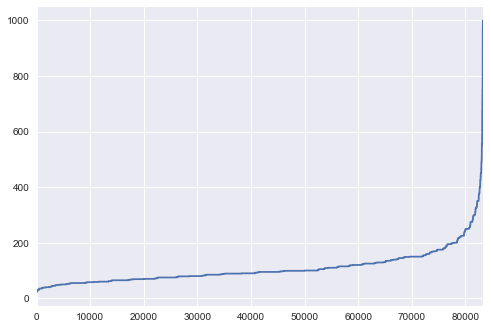

In [201]:
import matplotlib.pyplot as plt
features['price'].sort_values().reset_index(drop=True).plot()
plt.show()

In [202]:
fitters = features

In [203]:
from sklearn.linear_model import LinearRegression

In [209]:
fitters.iloc[:,:].head(2)

,neighbourhood_group,neighbourhood,room_type,compound,negativity,neutrality,positivity,minimum_nights,number_of_reviews,reviews_per_month,price,calculated_host_listings_count,availability_365,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle,Alki,Arbor Heights,Atlantic,Belltown,Bitter Lake,Briarcliff,Brighton,Broadview,Broadway,Bryant,Cedar Park,Central Business District,Columbia City,Crown Hill,Dunlap,East Queen Anne,Eastlake,Fairmount Park,Fauntleroy,First Hill,Fremont,Gatewood,Genesee,Georgetown,Green Lake,Greenwood,Haller Lake,Harrison/Denny-Blaine,High Point,Highland Park,Holly Park,Industrial District,Interbay,International District,Laurelhurst,Lawton Park,Leschi,Lower Queen Anne,Loyal Heights,Madison Park,Madrona,Mann,Maple Leaf,Matthews Beach,Meadowbrook,Mid-Beacon Hill,Minor,Montlake,Mount Baker,North Admiral,North Beach/Blue Ridge,North Beacon Hill,North College Park,North Delridge,North Queen Anne,Olympic Hills,Phinney Ridge,Pike-Market,Pinehurst,Pioneer Square,Portage Bay,Rainier Beach,Ravenna,Riverview,Roosevelt,Roxhill,Seaview,Seward Park,South Beacon Hill,South Delridge,South Lake Union,South Park,Southeast Magnolia,Stevens,Sunset Hill,University District,Victory Heights,View Ridge,Wallingford,Wedgwood,West Queen Anne,West Woodland,Westlake,Whittier Heights,Windermere,Yesler Terrace,Private room,Shared room
0,Queen Anne,West Queen Anne,Entire home/apt,0.8997,0.081,0.55,0.368,1,207,4.07,85,2,346,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Queen Anne,West Queen Anne,Entire home/apt,0.9859,0.000,0.74,0.260,1,207,4.07,85,2,346,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [210]:
fitters_wo_txt=fitters.iloc[:,7:] 
fitters_w_txt=fitters.iloc[:,3:]


In [206]:
fitters_w_txt.columns

Index([u'compound', u'negativity', u'neutrality', u'positivity',
       u'minimum_nights', u'number_of_reviews', u'reviews_per_month', u'price',
       u'calculated_host_listings_count', u'availability_365',
       ...
       u'Wallingford', u'Wedgwood', u'West Queen Anne', u'West Woodland',
       u'Westlake', u'Whittier Heights', u'Windermere', u'Yesler Terrace',
       u'Private room', u'Shared room'],
      dtype='object', length=114)

In [211]:
clf1 = LinearRegression()
clf2 = LinearRegression()

y = fitters['price']
clf1.fit(fitters.iloc[:,7:].drop('price', axis='columns'), y)
clf2.fit(fitters.iloc[:,3:].drop('price', axis='columns'), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [212]:
y_pred_wo = clf1.predict(fitters.iloc[:,7:].drop('price', axis='columns'))
y_pred_w = clf2.predict(fitters.iloc[:,3:].drop('price', axis='columns'))

In [213]:
pd.DataFrame({'y':y, 'y_pred_wo':y_pred_wo,'y_pred_w':y_pred_w})

,y,y_pred_w,y_pred_wo
0,85,141.061952,142.356682
1,85,142.326191,142.356682
2,85,142.288132,142.356682
3,85,142.284889,142.356682
4,85,142.317540,142.356682
5,85,142.286549,142.356682
6,85,142.406197,142.356682
7,85,142.187873,142.356682
8,85,142.232696,142.356682
9,85,142.009523,142.356682


In [214]:
import sklearn.metrics
import math

In [215]:
mse1 = sklearn.metrics.mean_squared_error(y, y_pred_wo)
mse2 = sklearn.metrics.mean_squared_error(y, y_pred_w)
pd.DataFrame({'rmse_wo':math.sqrt(mse1), 'rmse_w':math.sqrt(mse2)},index=np.arange(1))

,rmse_w,rmse_wo
0,57.182472,57.183956


In [216]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

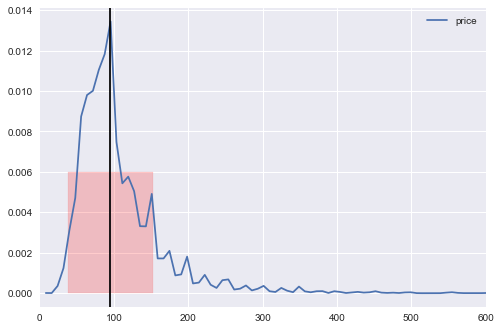

In [217]:
sns.kdeplot(y)
ax = plt.gca()
ax.set_xlim([0, 600])
plt.axvline(y.median(), c='black')
ax.add_patch(
    patches.Rectangle((y.median() - math.sqrt(mse1), 0), 2*math.sqrt(mse1), 0.006,
                      color='r', alpha=0.2)
)
plt.show()

In [218]:
r_squared_wo = sklearn.metrics.r2_score(y, y_pred_wo)
r_squared_w = sklearn.metrics.r2_score(y, y_pred_w)
pd.DataFrame({'Rsq_wo':r_squared_wo, 'Rsq_w':r_squared_w},index=np.arange(1))

,Rsq_w,Rsq_wo
0,0.305496,0.30546


In [219]:
coefs1 = list(zip(clf1.coef_, fitters.drop('price', axis='columns')))

coefs2 = list(zip(clf2.coef_, fitters.drop('price', axis='columns')))


In [220]:
neighborhoods = np.unique(joined_table['neighbourhood_group'])
neighborhood_effects1 = [v for v in coefs1 if v[1] in neighborhoods]
neighborhood_effects2 = [v for v in coefs2 if v[1] in neighborhoods]

In [221]:
neighborhood_effects1

[(-12872627689.606407, 'Beacon Hill'),
 (-14447205986.005688, 'Capitol Hill'),
 (-3835465098.180625, 'Cascade'),
 (677357590.50334167, 'Central Area'),
 (-997697275.00114155, 'Delridge'),
 (1014552290.8782921, 'Downtown'),
 (-2172366756.4676208, 'Interbay'),
 (-424204203.37801361, 'Lake City'),
 (1212696258.1391277, 'Magnolia'),
 (-1212696250.3062758, 'Northgate'),
 (-1212696246.6580629, 'Other neighborhoods'),
 (32563421997.265942, 'Queen Anne'),
 (2152063142.1573257, 'Rainier Valley'),
 (-677357631.99735975, 'Seward Park'),
 (14447206011.232475, 'University District'),
 (-1014552311.2187116, 'West Seattle'),
 (169995420465.63211, 'Interbay'),
 (18.770543098449707, 'Seward Park'),
 (-4670506760.1364632, 'University District')]

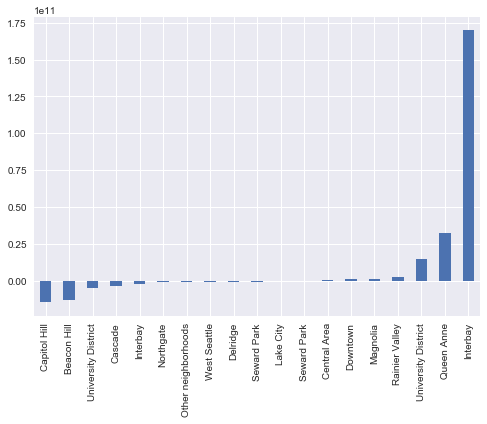

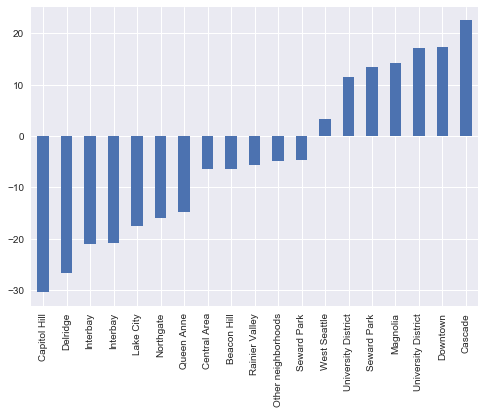

In [222]:
pd.Series(data=[n[0] for n in neighborhood_effects1],
          index=[n[1] for n in neighborhood_effects1])\
    .sort_values()\
    .plot(kind='bar')
plt.show()
    
pd.Series(data=[n[0] for n in neighborhood_effects2],
          index=[n[1] for n in neighborhood_effects2])\
    .sort_values()\
    .plot(kind='bar')
    
plt.show()